# Traveling Santa 2018 - Prime Paths  
https://www.kaggle.com/c/traveling-santa-2018-prime-paths

In [2]:
import numpy as np
import pandas as pd
from sympy import isprime
import matplotlib.pyplot as plt
%matplotlib inline

In [482]:
cities = pd.read_csv('input/cities.csv')
#sub = pd.read_csv('input/sample_submission.csv')

In [483]:
cities.head()

,CityId,X,Y
0,0,316.836739,2202.340707
1,1,4377.405972,336.602082
2,2,3454.158198,2820.053011
3,3,4688.099298,2935.898056
4,4,1010.696952,3236.750989


In [484]:
cities.tail()

,CityId,X,Y
197764,197764,149.828018,3134.756986
197765,197765,2615.299239,2267.979286
197766,197766,4775.889874,3103.846228
197767,197767,2994.230955,1931.764344
197768,197768,1354.764778,3218.100625


In [485]:
# total primes 
np.sum([isprime(i) for i in range(len(cities))]) 

17802

In [486]:
connected = [False] * len(cities)

In [487]:
prime_list = []
for i in range(len(cities)):
    if isprime(i):
        prime_list.append(i)
len(prime_list)  # 17802

17802

In [488]:
def dist(base_index, next_index):
    if base_index < len(cities) - 1:
        d = ((cities.X[base_index] - cities.X[next_index])**2 + (cities.Y[base_index] - cities.Y[next_index])**2)**0.5
    else:
        d = ((cities.X[base_index] - cities.X[0])**2 + (cities.Y[base_index] - cities.Y[0])**2)**0.5
    return d

In [489]:
def closest(base_index):
    min_dist = np.inf
    connected[base_index] = True
    min_index = -1
    for i in cities.index.values:
        if i != base_index and  connected[i] == False and not isprime(i):
            d = dist(base_index, i)
            if d < min_dist:
                min_dist = d
                min_index = i
    connected[min_index] = True
    return min_index

In [490]:
def closest_prime(base_index):
    min_dist = np.inf
    min_index = -1
    for i in prime_list:
        if connected[i] == False:
            d = dist(base_index, i)
            if i != base_index and d < min_dist:
                min_dist = d
                min_index = i
    connected[min_index] == True
    return min_index

In [491]:
from tqdm import tqdm

index = 0
route = [0]

for _ in tqdm(range(10)):
    for _ in range(1, 9):
        index = closest(index)
        route.append(index)

    p = closest_prime(route[-1])
    route.append(p)
    
    p10 = closest(route[-1])
    route.append(p10)
    index = p10
    
route


100%|██████████| 10/10 [11:49<00:00, 70.97s/it]


[0,
 78934,
 111804,
 52086,
 18295,
 134585,
 109090,
 37150,
 96442,
 5333,
 117533,
 25283,
 142366,
 122542,
 126815,
 181677,
 110241,
 182416,
 47302,
 85621,
 5523,
 139587,
 132448,
 78974,
 189143,
 2112,
 137906,
 146984,
 189346,
 112223,
 119154,
 47233,
 194256,
 155212,
 24164,
 92343,
 65277,
 146918,
 173131,
 38747,
 165295,
 39574,
 83570,
 185978,
 33092,
 194108,
 181554,
 150165,
 182402,
 176887,
 165539,
 32488,
 30902,
 4245,
 194268,
 68149,
 145506,
 160204,
 21311,
 36109,
 62647,
 155909,
 152918,
 19200,
 74025,
 95218,
 182298,
 170830,
 133710,
 42023,
 134011,
 141261,
 148749,
 184418,
 114307,
 153431,
 93956,
 157289,
 66632,
 62897,
 90875,
 58786,
 10,
 187534,
 193318,
 85445,
 118672,
 81668,
 96440,
 9059,
 60323,
 61392,
 113020,
 45380,
 166221,
 131720,
 879,
 188104,
 141776,
 161159,
 153710]

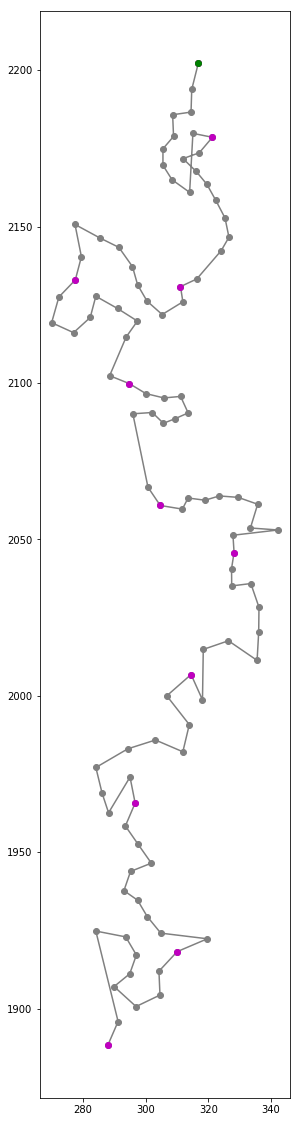

In [493]:
x = [cities.X[i] for i in route]
y = [cities.Y[i] for i in route]
x10 =[]
y10 =[]
for i in range(len(x)):
    if i % 10 == 0:
        x10.append(x[i])
        y10.append(y[i])

plt.figure(figsize=(20,20))
plt.plot(x, y, 'gray')
plt.scatter(x, y, c='gray')
plt.plot(x10, y10, 'mo')
plt.plot(x[0], y[0], 'go')
plt.gca().set_aspect('equal', adjustable='box')